## waste management using cnn


In [ ]:
pip install opencv-python

In [ ]:
pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [8]:
import zipfile

zip_path = "/content/TRAIN.zip"  # Adjust path if needed
extract_path = "/content/TRAIN"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed.")

Extraction completed.


In [9]:
train_path = "/content/TRAIN/TRAIN"
test_path = "/content/TEST/TEST"

print("Train folder:", os.listdir(train_path) if os.path.exists(train_path) else "Not Found")
print("Test folder:", os.listdir(test_path) if os.path.exists(test_path) else"Not Found")

Train folder: ['R', 'O']
Test folder: ['R', 'O']


In [5]:
import os

# Check if the extracted folder exists
dataset_path = "/content/dataset2"
if os.path.exists(dataset_path):
    print("Dataset exists.")
    print("Contents:", os.listdir(dataset_path))
else:
    print("Dataset NOT found!")

Dataset NOT found!


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

visualisation

In [10]:
#visualisation
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
# Move the data assignment outside the loop
data =pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 12565/12565 [00:05<00:00, 2338.49it/s]


In [11]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

In [ ]:
data.shape

(22564, 2)

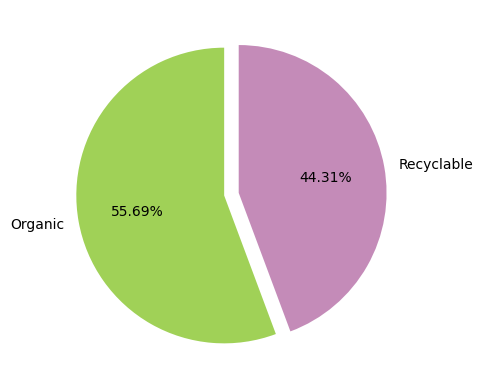

In [12]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()

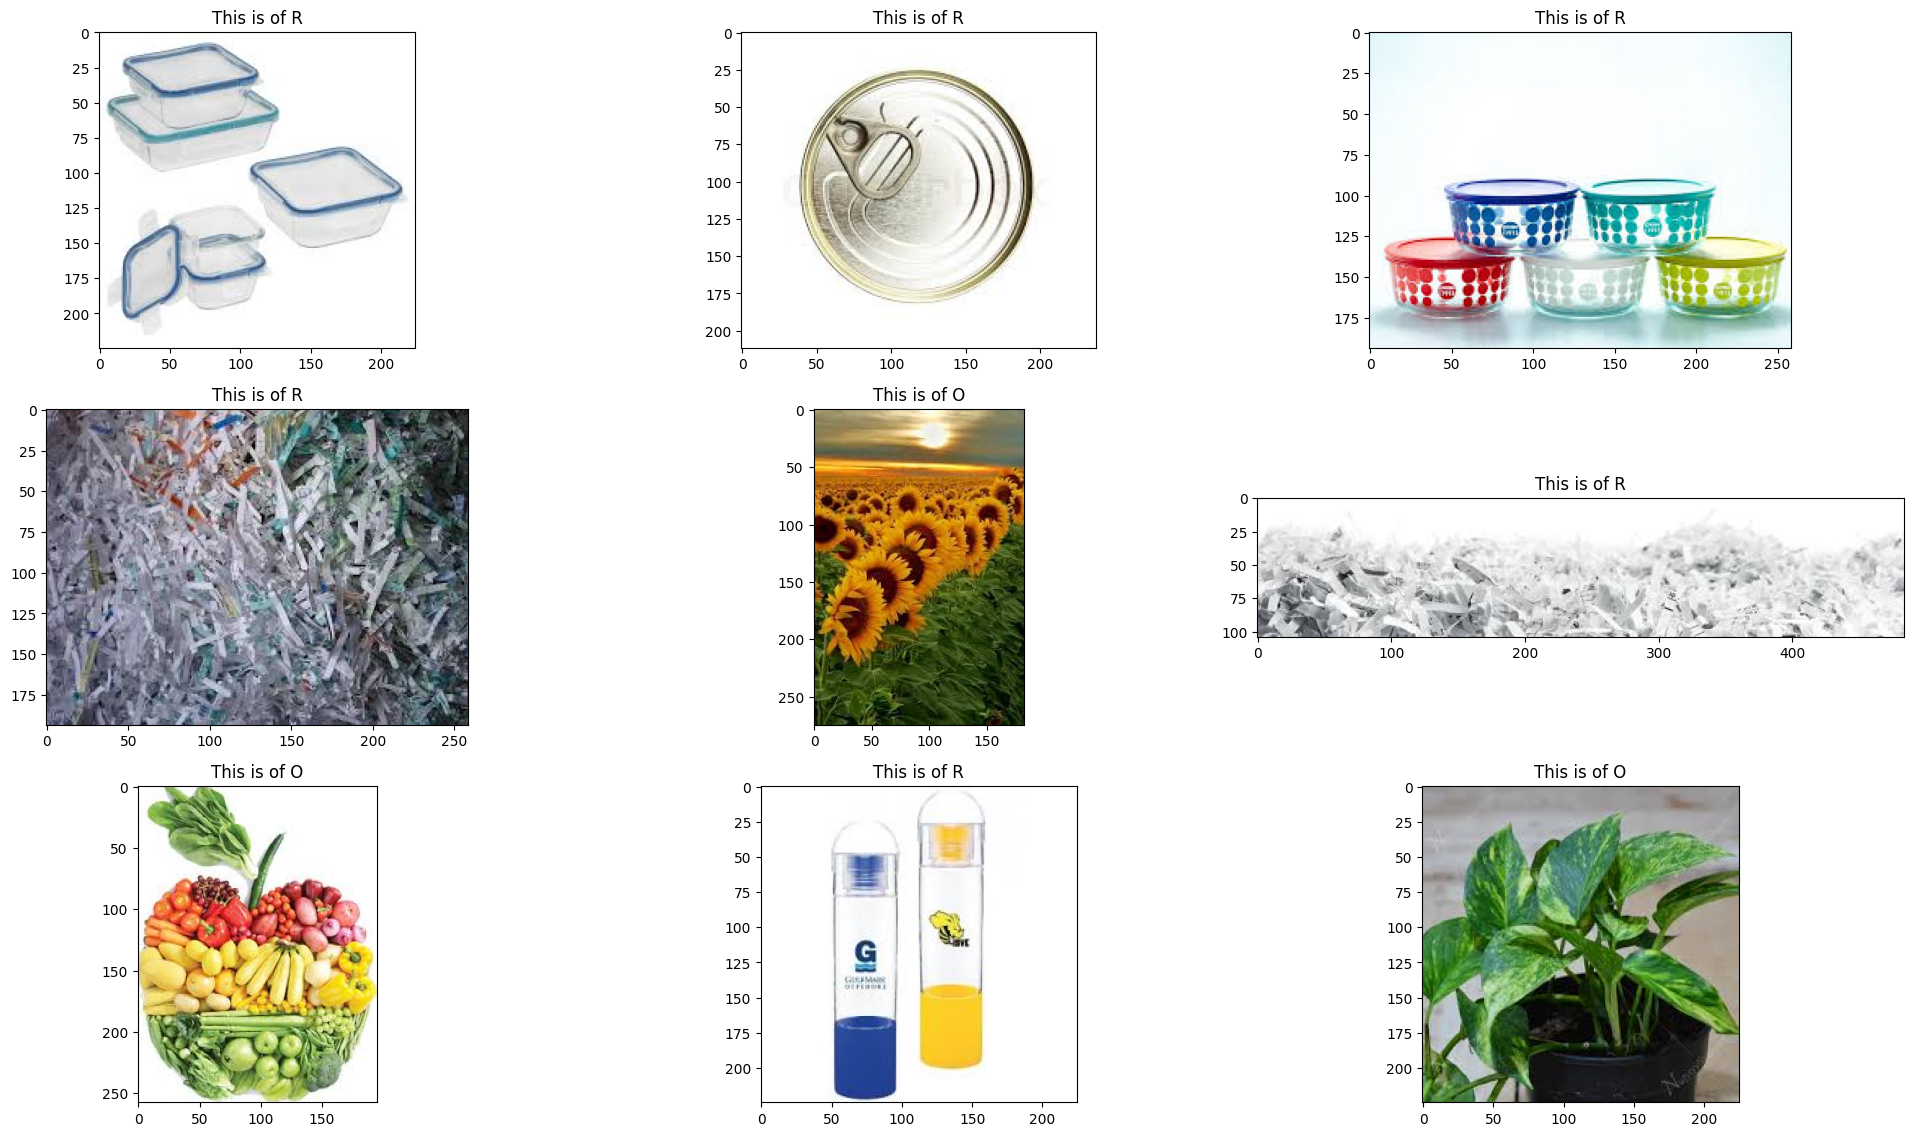

In [13]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN part

In [14]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])
batch_size=64

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [18]:
hist=model.fit(
    train_generator,
    epochs=9,
    validation_data=test_generator
)

Epoch 1/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 72s 173ms/step - accuracy: 0.7635 - loss: 0.5432 - val_accuracy: 0.8524 - val_loss: 0.3585
Epoch 2/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 50s 141ms/step - accuracy: 0.8342 - loss: 0.3984 - val_accuracy: 0.8349 - val_loss: 0.3565
Epoch 3/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.8551 - loss: 0.3591 - val_accuracy: 0.8818 - val_loss: 0.2856
Epoch 4/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.8739 - loss: 0.3213 - val_accuracy: 0.8225 - val_loss: 0.3948
Epoch 5/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.8872 - loss: 0.2931 - val_accuracy: 0.8914 - val_loss: 0.2764
Epoch 6/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.9041 - loss: 0.2490 - val_accuracy: 0.8977 - val_loss: 0.2810
Epoch 7/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 146ms/step - accuracy: 0.9257 - loss: 0.2029 - val_accuracy: 0.9001 - val_loss: 0.3044
Epoch 8/9
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.9372 - loss: 0.1692 - 

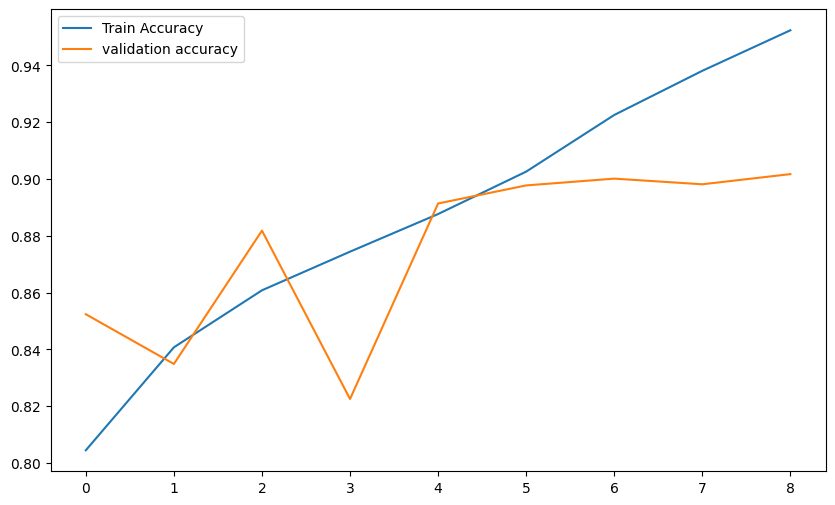

In [19]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='Train Accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

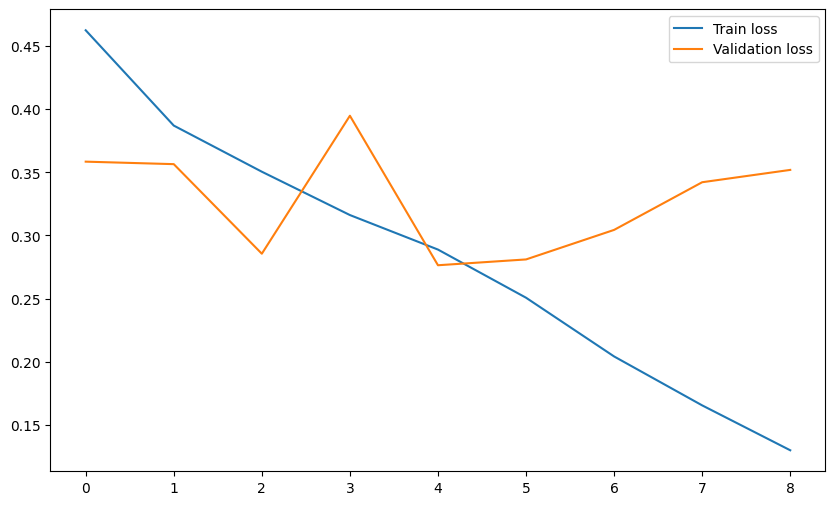

In [20]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [21]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
This image shows organic waste


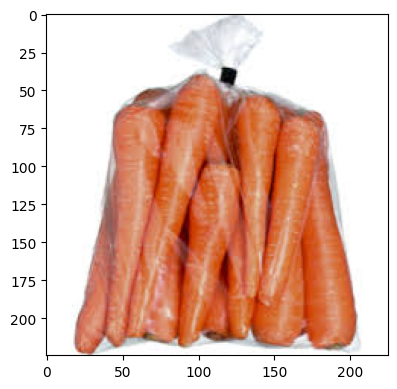

In [22]:
test_img=cv2.imread('/content/TEST/TEST/O/O_12575.jpg')
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
This image shows recyclable waste


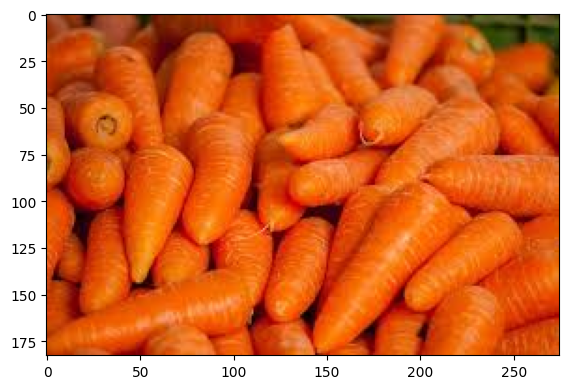

In [23]:
test_img=cv2.imread('/content/TEST/TEST/O/O_12636.jpg')
predict_func(test_img)